## Description:

    Ordination for OCS meeting



# Setting variables

In [198]:

%load_ext rpy2.ipython

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [199]:
%%R
# Note that Nick has separate phyloseq objects for sip and the bulk soil saved
physeqDir = '/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/'

physeqFull = 'Full-Sparsity3in3_relabund'

# Init

In [200]:
%%R
library(ggplot2)
library(foreach)
library(doParallel)
library(gridExtra)

library(tidyr)
library(vegan)
library(dplyr)
library(phyloseq)

In [201]:
%%R
set.seed(605)

# Setting files

# Loading phyloseq object

In [203]:
%%R
?readRDS

R Help on ‘readRDS’readRDS                  package:base                  R Documentation

_S_e_r_i_a_l_i_z_a_t_i_o_n _I_n_t_e_r_f_a_c_e _f_o_r _S_i_n_g_l_e _O_b_j_e_c_t_s

_D_e_s_c_r_i_p_t_i_o_n:

     Functions to write a single R object to a file, and to restore it.

_U_s_a_g_e:

     saveRDS(object, file = "", ascii = FALSE, version = NULL,
             compress = TRUE, refhook = NULL)
     
     readRDS(file, refhook = NULL)
     
_A_r_g_u_m_e_n_t_s:

  object: R object to serialize.

    file: a connection or the name of the file where the R object is
          saved to or read from.

   ascii: a logical.  If ‘TRUE’ or ‘NA’, an ASCII representation is
          written; otherwise (default), a binary one is used.  See the
          comments in the help for ‘save’.

 version: the workspace format version to use.  ‘NULL’ specifies the
          current default version (2).  Versions prior to 2 are not
          supported

In [202]:
%%R 
F = file.path('/home/bryan/RhizCG/data/MiSeq_amplicon/MergedRuns/physeq/Full-Sparsity3in3_relabund')
physeq.Full = readRDS(F)
physeq.Full.m = physeq.Full %>% sample_data
physeq.Full

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4982 taxa and 238 samples ]
sample_data() Sample Data:       [ 238 samples by 45 sample variables ]
tax_table()   Taxonomy Table:    [ 4982 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4982 tips and 4981 internal nodes ]


In [155]:
%%R
colnames(sample_data(physeq))

 [1] "X.sample"            "Library"             "Primer_Plate"       
 [4] "Primer_Well_ID"      "primerFR_ID_byPlate" "primerFR_ID_total"  
 [7] "barcode_ID"          "PlotID"              "Plant"              
[10] "Plot"                "Treatment"           "Rep"                
[13] "DAP"                 "Sampling"            "PlantSample"        
[16] "Type"                "Grass_Broad"         "Status"             
[19] "Subfamily"           "fwd_barcode"         "rev_barcode"        
[22] "Planted"             "Biomass_P"           "SLA"                
[25] "Leaf_N"              "Leaf_C"              "LeafC_N"            
[28] "LNa"                 "Plant_N"             "Plant_C"            
[31] "Plant_CN"            "d15N"                "tN_p"               
[34] "BX_rel"              "CB_rel"              "LAP_rel"            
[37] "NAG_rel"             "NO3_ug_g"            "NH4_ug_g"           
[40] "InorganicN"          "Resid_logB"          "Resid_logN"         
[43] "

## Calculate pairwise weighted Unifrac distances between samples

In [156]:
%%R
registerDoParallel(cores=28)
wunif.dist = distance(physeq.Full, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

## NMDS of w-UniFrac and unweighted UniFrac

In [157]:
%%R -w 800 -h 350

sample_data(physeq.Full)$DAP = factor(sample_data(physeq.Full)$DAP)

sample_data(physeq.Full)$Rep = factor(sample_data(physeq.Full)$Rep)

nmds_w = ordinate(physeq.Full, 
                method = "NMDS", 
                distance = wunif.dist)



Run 0 stress 0.1405104 
Run 1 stress 0.1527848 
Run 2 stress 0.1420502 
Run 3 stress 0.1850273 
Run 4 stress 0.1555011 
Run 5 stress 0.155584 
Run 6 stress 0.16855 
Run 7 stress 0.1453772 
Run 8 stress 0.1922596 
Run 9 stress 0.1933912 
Run 10 stress 0.1765865 
Run 11 stress 0.1422168 
Run 12 stress 0.171754 
Run 13 stress 0.1430624 
Run 14 stress 0.1577343 
Run 15 stress 0.1430439 
Run 16 stress 0.1636811 
Run 17 stress 0.1434255 
Run 18 stress 0.1580137 
Run 19 stress 0.1801313 
Run 20 stress 0.1420489 


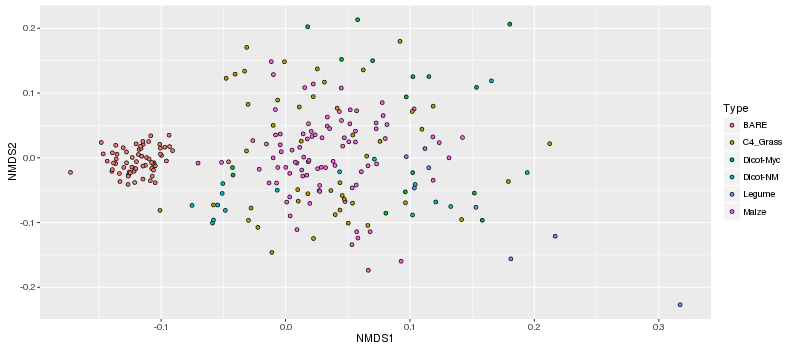

In [158]:
%%R -w 800 -h 350
p = plot_ordination(physeq.Full, nmds_w, justDF = TRUE)


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Type), pch = 21)
        #scale_size(range=c(2,8))

p1

### Weighted Unifrac figure

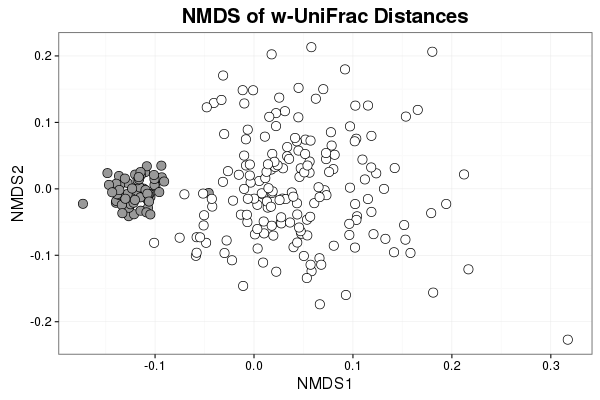

In [165]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#p1 = ggplot(p, aes)+
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(data = subset(p, Planted == "BARE"), aes(x = NMDS1, y = NMDS2), fill = "#999999", pch = 21, size = 4) + 
        geom_point(data = subset(p, Planted == "Rhizosphere"), aes(x = NMDS1, y = NMDS2), fill = "white", pch = 21, size = 4) +
        #scale_fill_manual(values=cbPalette[c(2,1,1,1,1,1, 5)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
#p1 = p1 +  geom_point(data = subset(p, Type=="Maize"), aes(x = NMDS1, y = NMDS2), fill = "#0072B2", pch = 21, size = 4) 

p1
ggsave(p1, file = "/home/bryan/RhizCG/figures/ordinations/nmds_1_OCS.pdf", width = 8, height = 6)

In [172]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#p1 = ggplot(p, aes)+
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(data = subset(p, Planted == "BARE"), aes(x = NMDS1, y = NMDS2), fill = "#999999", pch = 21, size = 3) + 
        geom_point(data = subset(p, Planted == "Rhizosphere"), aes(x = NMDS1, y = NMDS2), fill = "white", pch = 21, size = 3) +
        #scale_fill_manual(values=cbPalette[c(2,1,1,1,1,1, 5)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
p1 = p1 +  geom_point(data = subset(p, Type %in% c("Dicot-Myc", "Dicot-NM")), aes(x = NMDS1, y = NMDS2, fill = Plant), pch = 21, size = 4) 

p1
ggsave(p1, file = "/home/bryan/RhizCG/figures/ordinations/nmds_Dicots_OCS.pdf", width = 8, height = 6)

In [176]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#p1 = ggplot(p, aes)+
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(data = subset(p, Planted == "BARE"), aes(x = NMDS1, y = NMDS2), fill = "#999999", pch = 21, size = 3) + 
        geom_point(data = subset(p, Planted == "Rhizosphere"), aes(x = NMDS1, y = NMDS2), fill = "white", pch = 21, size = 3) +
        #scale_fill_manual(values=cbPalette[c(2,1,1,1,1,1, 5)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
p1 = p1 +  geom_point(data = subset(p, Type %in% c("C4_Grass")), aes(x = NMDS1, y = NMDS2, fill = Plant), pch = 21, size = 4) 

p1
ggsave(p1, file = "/home/bryan/RhizCG/figures/ordinations/nmds_C4grasses_OCS.pdf", width = 8, height = 6)

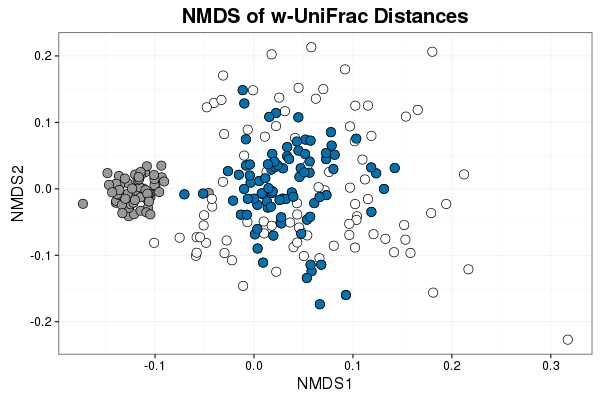

In [175]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#p1 = ggplot(p, aes)+
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(data = subset(p, Planted == "BARE"), aes(x = NMDS1, y = NMDS2), fill = "#999999", pch = 21, size = 4) + 
        geom_point(data = subset(p, Planted == "Rhizosphere"), aes(x = NMDS1, y = NMDS2), fill = "white", pch = 21, size = 4) +
        #scale_fill_manual(values=cbPalette[c(2,1,1,1,1,1, 5)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
p1 = p1 +  geom_point(data = subset(p, Type=="Maize"), aes(x = NMDS1, y = NMDS2), fill = "#0072B2", pch = 21, size = 4) 

p1 %>% print
ggsave(p1, file = "/home/bryan/RhizCG/figures/ordinations/nmds_MaizeBlue_OCS.pdf", width = 8, height = 6)

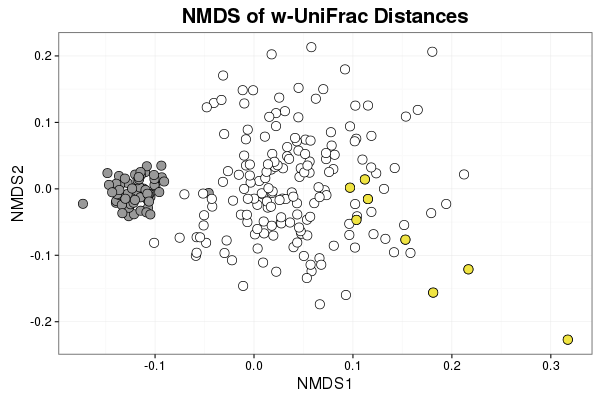

In [180]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#p1 = ggplot(p, aes)+
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(data = subset(p, Planted == "BARE"), aes(x = NMDS1, y = NMDS2), fill = "#999999", pch = 21, size = 4) + 
        geom_point(data = subset(p, Planted == "Rhizosphere"), aes(x = NMDS1, y = NMDS2), fill = "white", pch = 21, size = 4) +
        #scale_fill_manual(values=cbPalette[c(2,1,1,1,1,1, 5)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
p1 = p1 +  geom_point(data = subset(p, Type=="Legume"), aes(x = NMDS1, y = NMDS2), fill ="#F0E442", pch = 21, size = 4) 

p1 %>% print

ggsave(p1, file = "/home/bryan/RhizCG/figures/ordinations/nmds_legume_OCS.pdf", width = 8, height = 6)


In [179]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
#p1 = ggplot(p, aes)+
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(data = subset(p, Planted == "BARE"), aes(x = NMDS1, y = NMDS2), fill = "#999999", pch = 21, size = 4) + 
        geom_point(data = subset(p, Planted == "Rhizosphere"), aes(x = NMDS1, y = NMDS2), fill = "white", pch = 21, size = 4) +
        #scale_fill_manual(values=cbPalette[c(2,1,1,1,1,1, 5)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
p1 = p1 +  geom_point(data = subset(p, Type=="Maize"), aes(x = NMDS1, y = NMDS2, fill = Plant), pch = 21, size = 4) 

p1
ggsave(p1, file = "/home/bryan/RhizCG/figures/ordinations/nmds_Maize_OCS.pdf", width = 8, height = 6)

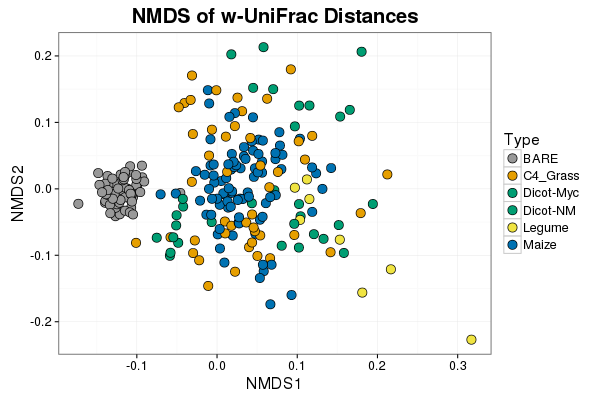

In [34]:
%%R -w 600 -h 400
cbPalette <- c("white", "#999999", "#E69F00", "#56B4E9", "#009E73", "#F0E442", "#0072B2", "#D55E00", "#CC79A7")
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Type), pch = 21, size = 4) + 
        scale_fill_manual(values=cbPalette[c(2,3,5,5,6,7)]) + 
        ggtitle("NMDS of w-UniFrac Distances") +
        theme_bw(base_size = 16) +
        theme(plot.title = element_text(face="bold", size=20)) #+
        #guides(fill=guide_legend(ncol=2))
p1

In [191]:
%%R
#calculate means of Bare soil vs Planted treatments
Sd = sample_data(physeq.Full) %>% as.data.frame()
Rhiz = Sd[Sd$Planted == "Rhizosphere",] 
Enz = Rhiz[!is.na(Rhiz$BX_rel),]
           
Enz$Plant = droplevels(Enz$Plant) 

In [193]:
%%R
Enz

Sample Data:        [174 samples by 45 sample variables]:
                           X.sample Library Primer_Plate Primer_Well_ID
sample5-1.22_Nneg sample5-1.22_Nneg       1            1             A4
sample6-4.12_Npos sample6-4.12_Npos       1            2             H3
sample4-1.03_Npos sample4-1.03_Npos       1            1             B3
sample5-2.06_Npos sample5-2.06_Npos       1            2             D1
sample5-4.08_Npos sample5-4.08_Npos       1            2             H1
sample5-4.28_Npos sample5-4.28_Npos       1            1             H4
sample5-1.29_Npos sample5-1.29_Npos       1            1             B5
sample4-2.02_Nneg sample4-2.02_Nneg       1            1             C3
sample4-4.21_Nneg sample4-4.21_Nneg       1            1             G3
sample6-2.13_Npos sample6-2.13_Npos       1            2             D3
sample5-2.29_Nneg sample5-2.29_Nneg       1            1             C4
sample5-2.06_Nneg sample5-2.06_Nneg       1            2             C1
sample

In [197]:
%%R


by_treat = group_by(Enz, Plant)

# Emeans = summarize(by_treat,
#               N = length(BX_rel),
#                    bx.m = mean(BX_rel),
#                    bx.se = sd(BX_rel)/sqrt(length(BX_rel)),
#                   cb.m = mean(CB_rel),
#                    cb.se = sd(CB_rel)/sqrt(length(BX_rel)),
#                   lap.m = mean(LAP_rel),
#                    lap.se = sd(LAP_rel)/sqrt(length(BX_rel)),
#                     nag.m = mean(NAG_rel),
#                   nag.se = sd(NAG_rel)/sqrt(length(BX_rel)))
#head(Emeans)


Error in eval(expr, envir, enclos) : 
  could not convert using R function : as.data.frame


## Hypothesis testing of weighted and un-weighted unifrac

In [51]:
%%R
df = as(sample_data(physeq.snorm), "data.frame")
d = wunif.dist
Fulladonis = adonis(formula = d ~ Library + Planted + DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ Library + Planted + DAP + Plant + Treatment,      data = df, permutations = 999, strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Library     1    0.4041 0.40415  37.643 0.06279  0.001 ***
Planted     1    1.8434 1.84343 171.701 0.28639  0.001 ***
DAP         7    0.7159 0.10227   9.525 0.11122  0.148    
Plant      21    1.2197 0.05808   5.410 0.18948  0.004 ** 
Treatment   1    0.0420 0.04203   3.915 0.00653  0.001 ***
Residuals 206    2.2117 0.01074         0.34360           
Total     237    6.4368                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [26]:
%%R
a = data.frame(Fulladonis$aov.tab)
write.table(a, file = "/home/bryan/RhizCG/figures/FullADONIS.txt", sep = "\t")

In [27]:
%%R
#Check model without Treatment effect only Nneg
df = as(sample_data(physeq.snorm.Nneg), "data.frame")
d = wunif.dist.Nneg
Nnegadonis = adonis(formula = d ~ Library + Planted + DAP + Plant, df, strata = df$Rep, permutations = 999)
Nnegadonis


Call:
adonis(formula = d ~ Library + Planted + DAP + Plant, data = df,      permutations = 999, strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Library     1   0.19710 0.19710  20.767 0.06589  0.001 ***
Planted     1   0.85408 0.85408  89.989 0.28553  0.001 ***
DAP         1   0.07093 0.07093   7.473 0.02371  0.001 ***
Plant      21   0.97692 0.04652   4.902 0.32660  0.001 ***
Residuals  94   0.89214 0.00949         0.29826           
Total     118   2.99116                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [28]:
%%R
df = as(sample_data(physeq.snorm), "data.frame")
d = unif.dist
Fulladonis = adonis(formula = d ~ DAP +  Planted + Plant + Treatment + Rep, df, strata = df$Rep:df$Plant, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ DAP + Planted + Plant + Treatment + Rep,      data = df, permutations = 999, strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
DAP         7    2.7473 0.39247   6.897 0.14127  0.001 ***
Planted     1    2.0349 2.03487  35.758 0.10464  0.003 ** 
Plant      21    2.5729 0.12252   2.153 0.13231  0.169    
Treatment   1    0.1265 0.12648   2.223 0.00650  0.001 ***
Rep         3    0.3560 0.11866   2.085 0.01831  0.001 ***
Residuals 204   11.6089 0.05691         0.59697           
Total     237   19.4464                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [29]:
%%R
df = as(sample_data(physeq.snorm.Nneg), "data.frame")
d = unif.dist.Nneg
Fulladonis = adonis(formula = d ~ DAP +  Planted + Plant + Rep, df, strata = df$Rep, permutations = 999)
Fulladonis


Call:
adonis(formula = d ~ DAP + Planted + Plant + Rep, data = df,      permutations = 999, strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
DAP         1    0.3536 0.35362  6.3131 0.03829  0.001 ***
Planted     1    0.9408 0.94080 16.7961 0.10187  0.001 ***
Plant      21    2.5897 0.12332  2.2016 0.28041  0.001 ***
Rep         1    0.0861 0.08608  1.5368 0.00932  0.001 ***
Residuals  94    5.2652 0.05601         0.57011           
Total     118    9.2354                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Bare soils change with time w-UniFrac

In [30]:
%%R

bare = subset_samples(physeq.snorm, Plant == "BARE")
sample_data(bare)$DAP = factor(sample_data(bare)$DAP)


In [31]:
%%R
registerDoParallel(cores=28)
bare.wunif.dist = distance(bare, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [32]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.wunif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

Run 0 stress 0.1542436 
Run 1 stress 0.1542442 
... procrustes: rmse 0.0002507872  max resid 0.001217342 
*** Solution reached


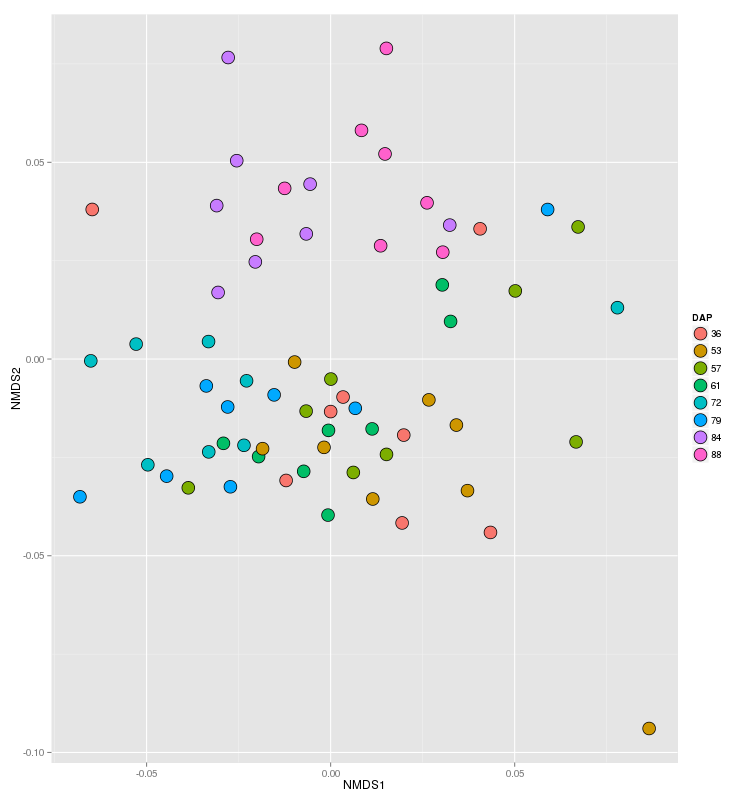

In [33]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=DAP), size = 6, pch=21) 

p1

### Hypothesis Test adonis

In [34]:
%%R
df = as(sample_data(bare), "data.frame")
d = bare.wunif.dist
bareadonis = adonis(d ~ DAP*Treatment + Rep, df, strata = df$Rep)
bareadonis


Call:
adonis(formula = d ~ DAP * Treatment + Rep, data = df, strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs   MeanSqs F.Model      R2 Pr(>F)    
DAP            7   0.09273 0.0132465  3.4007 0.28379  0.001 ***
Treatment      1   0.00598 0.0059844  1.5363 0.01832  0.107    
Rep            3   0.03059 0.0101961  2.6176 0.09362  0.001 ***
DAP:Treatment  7   0.02215 0.0031645  0.8124 0.06780  0.845    
Residuals     45   0.17529 0.0038953         0.53648           
Total         63   0.32674                   1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Bare Soil Change with Time uw-UniFrac

In [35]:
%%R
registerDoParallel(cores=28)
bare.unif.dist = distance(bare, 
                      method = "unifrac", 
                      weighted = FALSE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [36]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.unif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

Run 0 stress 0.1111079 
Run 1 stress 0.117226 
Run 2 stress 0.1127156 
Run 3 stress 0.1177622 
Run 4 stress 0.1186803 
Run 5 stress 0.1144089 
Run 6 stress 0.110915 
... New best solution
... procrustes: rmse 0.04180165  max resid 0.2306441 
Run 7 stress 0.1146754 
Run 8 stress 0.1181852 
Run 9 stress 0.1176653 
Run 10 stress 0.1111577 
... procrustes: rmse 0.06136973  max resid 0.3127377 
Run 11 stress 0.118282 
Run 12 stress 0.1197219 
Run 13 stress 0.1156584 
Run 14 stress 0.1199389 
Run 15 stress 0.1166225 
Run 16 stress 0.118856 
Run 17 stress 0.117195 
Run 18 stress 0.1180026 
Run 19 stress 0.1167836 
Run 20 stress 0.1155126 


In [37]:
%%R -w 800 -h 350


nmds = ordinate(bare, 
                method = "NMDS", 
               distance = bare.unif.dist)

p = plot_ordination(bare, nmds, justDF = TRUE)

Run 0 stress 0.1111079 
Run 1 stress 0.1154379 
Run 2 stress 0.1165295 
Run 3 stress 0.1182268 
Run 4 stress 0.1143508 
Run 5 stress 0.1200756 
Run 6 stress 0.1193092 
Run 7 stress 0.11531 
Run 8 stress 0.1193702 
Run 9 stress 0.1145769 
Run 10 stress 0.1156345 
Run 11 stress 0.1155686 
Run 12 stress 0.1145114 
Run 13 stress 0.1163852 
Run 14 stress 0.1192532 
Run 15 stress 0.1206561 
Run 16 stress 0.118437 
Run 17 stress 0.1146542 
Run 18 stress 0.1145165 
Run 19 stress 0.1150235 
Run 20 stress 0.115146 


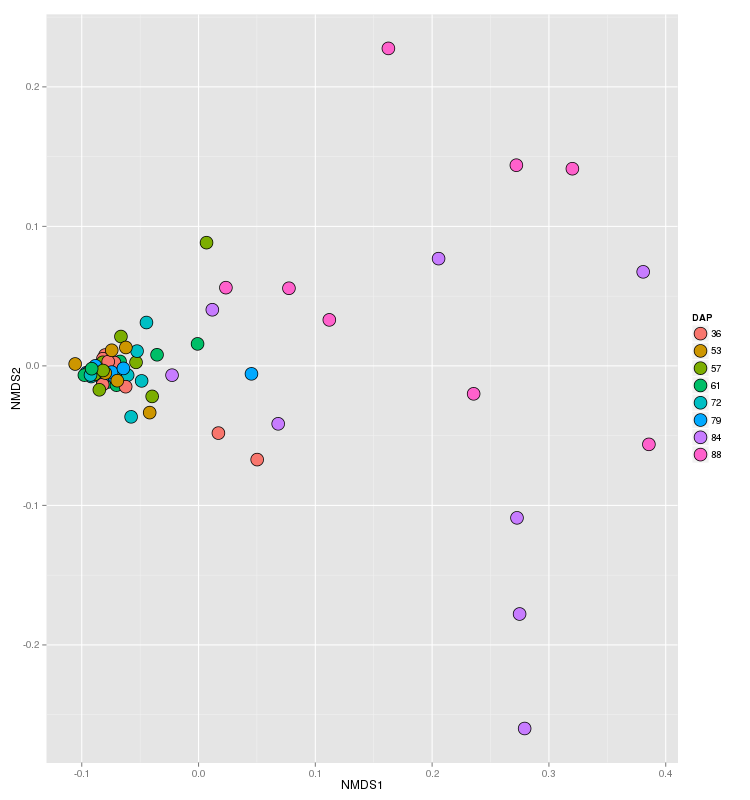

In [38]:
%%R -w 750 -h 800


## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=DAP), size = 6, pch=21) 

p1

### Hypothesis Test adonis

In [39]:
%%R
df = as(sample_data(bare), "data.frame")
d = bare.unif.dist
bareadonis = adonis(d ~ DAP*Treatment + Rep, df, strata = df$Rep)
bareadonis


Call:
adonis(formula = d ~ DAP * Treatment + Rep, data = df, strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

              Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)    
DAP            7   0.92294 0.131849  3.6794 0.30882  0.001 ***
Treatment      1   0.05671 0.056709  1.5825 0.01897  0.091 .  
Rep            3   0.15241 0.050805  1.4178 0.05100  0.001 ***
DAP:Treatment  7   0.24402 0.034860  0.9728 0.08165  0.508    
Residuals     45   1.61255 0.035834         0.53956           
Total         63   2.98864                  1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


# Rhizosphere Ordination

In [40]:
%%R

plant = subset_samples(physeq.snorm, Plant != "BARE")

#remove taxa that aren't in any plant samples
plant = filter_taxa(plant, function(x) max(x) > 0, TRUE)


In [41]:
%%R
registerDoParallel(cores=28)
plant.wunif.dist = distance(plant, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

In [42]:
%%R
df = as(sample_data(plant), "data.frame")
d = plant.wunif.dist
Plantadonis = adonis(formula = d ~ Library + DAP + Plant + Treatment, df, strata = df$Rep:df$Plant, permutations = 999)
Plantadonis


Call:
adonis(formula = d ~ Library + DAP + Plant + Treatment, data = df,      permutations = 999, strata = df$Rep:df$Plant) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

           Df SumsOfSqs MeanSqs F.Model      R2 Pr(>F)    
Library     1    0.3968 0.39681 29.9209 0.09313  0.001 ***
DAP         7    1.0862 0.15517 11.7004 0.25493  0.001 ***
Plant      13    0.7205 0.05542  4.1792 0.16911  0.001 ***
Treatment   1    0.0547 0.05469  4.1235 0.01283  0.001 ***
Residuals 151    2.0025 0.01326         0.47000           
Total     173    4.2608                 1.00000           
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


In [43]:
%%R
a = data.frame(Plantadonis$aov.tab)
write.table(a, file = "/home/bryan/RhizCG/figures/PlantADONIS.txt", sep = "\t")

### subset just plants from Nneg and Npos

In [44]:
%%R

plantNneg = subset_samples(plant, Treatment == "Nneg")
sample_data(plantNneg)$DAP = factor(sample_data(plantNneg)$DAP)
plantNneg %>% print
plantNpos = subset_samples(plant, Treatment == "Npos")
sample_data(plantNpos)$DAP = factor(sample_data(plantNpos)$DAP)
plantNpos %>% print

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4981 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 22 sample variables ]
tax_table()   Taxonomy Table:    [ 4981 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4981 tips and 4980 internal nodes ]
phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4981 taxa and 87 samples ]
sample_data() Sample Data:       [ 87 samples by 22 sample variables ]
tax_table()   Taxonomy Table:    [ 4981 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4981 tips and 4980 internal nodes ]


Run 0 stress 0.1707799 
Run 1 stress 0.1906772 
Run 2 stress 0.1848395 
Run 3 stress 0.1879933 
Run 4 stress 0.1787071 
Run 5 stress 0.1755568 
Run 6 stress 0.1881512 
Run 7 stress 0.1786787 
Run 8 stress 0.2030969 
Run 9 stress 0.1821865 
Run 10 stress 0.1765739 
Run 11 stress 0.169915 
... New best solution
... procrustes: rmse 0.0202056  max resid 0.2566915 
Run 12 stress 0.1830313 
Run 13 stress 0.2149443 
Run 14 stress 0.1858577 
Run 15 stress 0.186456 
Run 16 stress 0.1728272 
Run 17 stress 0.1776335 
Run 18 stress 0.1806786 
Run 19 stress 0.1902802 
Run 20 stress 0.4156459 


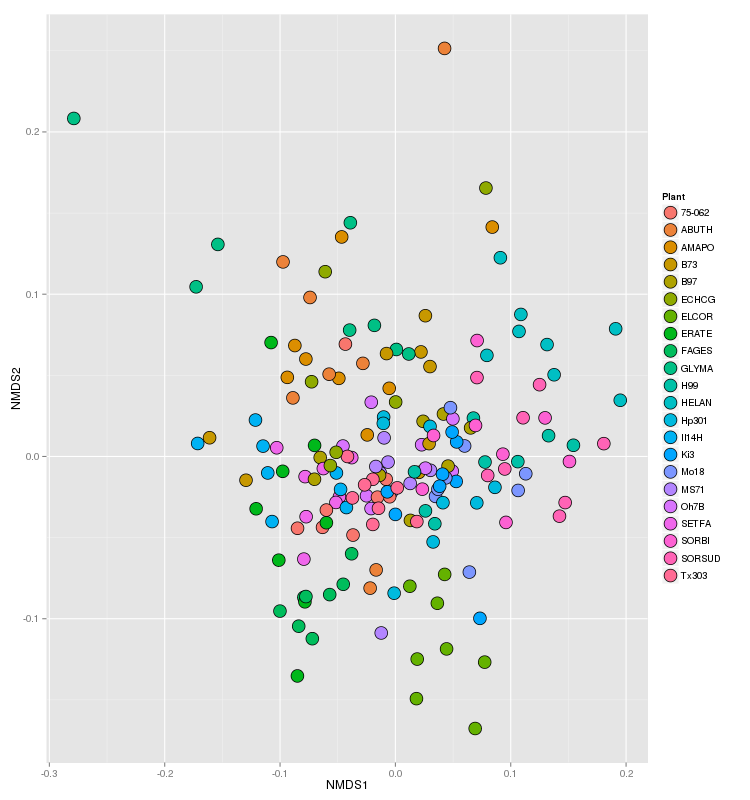

In [45]:
%%R -w 750 -h 800
#Whole plant set

plantnmds = ordinate(plant, 
                method = "NMDS", 
               distance = plant.wunif.dist)

p = plot_ordination(plant, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

In [46]:
%%R -w 750 -h 800
#Whole plant set

plantNnegnmds = ordinate(plantNneg, 
                method = "NMDS", 
               distance = plantNneg.wunif.dist)

p = plot_ordination(plantNneg, plantNnegnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1


Error in inherits(distance, "dist") : 
  object 'plantNneg.wunif.dist' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in inherits(distance, "dist") : 
  object 'plantNneg.wunif.dist' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: In addition: 
  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Warning message:

  res = super(Function, self).__call__(*new_args, **new_kwargs)
/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 'sampleSums' is deprecated.
Use 'sample_sums' instead.
See help("Deprecated") and help("phyloseq-deprecated"). 

  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [47]:
%%R -w 750 -h 800
#Whole plant set

plantNposnmds = ordinate(plantNpos, 
                method = "NMDS", 
               distance = plantNpos.wunif.dist)

p = plot_ordination(plantNpos, plantNposnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1



Error in inherits(distance, "dist") : 
  object 'plantNpos.wunif.dist' not found


/opt/anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: Error in inherits(distance, "dist") : 
  object 'plantNpos.wunif.dist' not found

  res = super(Function, self).__call__(*new_args, **new_kwargs)


## subset for particular day to test significance of plant while controlling for date

In [48]:
%%R
plant88 = subset_samples(plantNneg, DAP == 88)
plant88

phyloseq-class experiment-level object
otu_table()   OTU Table:         [ 4981 taxa and 16 samples ]
sample_data() Sample Data:       [ 16 samples by 22 sample variables ]
tax_table()   Taxonomy Table:    [ 4981 taxa by 8 taxonomic ranks ]
phy_tree()    Phylogenetic Tree: [ 4981 tips and 4980 internal nodes ]


In [49]:
%%R
registerDoParallel(cores=28)
plant88.wunif.dist = distance(plant88, 
                      method = "unifrac", 
                      weighted = TRUE,
                      fast = TRUE, 
                      parallel = TRUE, 
                      normalized = FALSE)

Run 0 stress 0.09862768 
Run 1 stress 0.1076345 
Run 2 stress 0.1076345 
Run 3 stress 0.09862762 
... New best solution
... procrustes: rmse 6.947001e-05  max resid 0.0002257924 
*** Solution reached


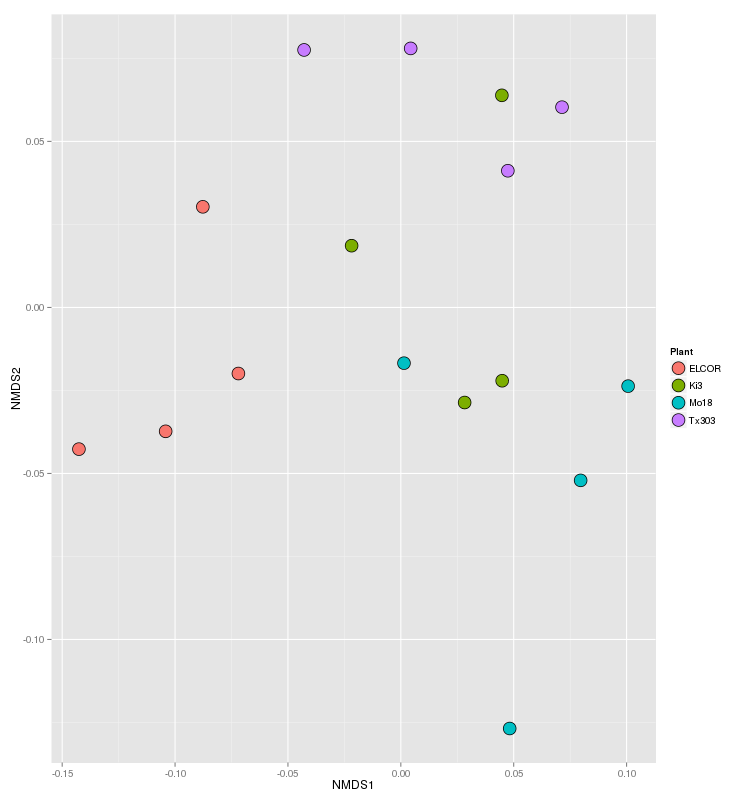

In [68]:
%%R -w 750 -h 800
#Day 88

plantnmds = ordinate(plant88, 
                method = "NMDS", 
               distance = plant88.wunif.dist)

p = plot_ordination(plant88, plantnmds, justDF = TRUE)

## generating plots
p1 = ggplot(p, aes(x = NMDS1, y = NMDS2)) +
        geom_point(aes(fill=Plant), size = 6, pch=21) 

p1

## Significance test of plant effect on single day

In [52]:
%%R
df = as(sample_data(plant88), "data.frame")
d = plant88.wunif.dist
plantadonis = adonis(d ~ Plant, df, strata = df$Rep)
plantadonis


Call:
adonis(formula = d ~ Plant, data = df, strata = df$Rep) 

Blocks:  strata 
Permutation: free
Number of permutations: 999

Terms added sequentially (first to last)

          Df SumsOfSqs  MeanSqs F.Model      R2 Pr(>F)   
Plant      3  0.097094 0.032365  3.3535 0.45604  0.003 **
Residuals 12  0.115813 0.009651         0.54396          
Total     15  0.212907                  1.00000          
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1
